# Analysing Oscar academy awards data

In [1]:
#import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Part 1)

In [2]:
#read the data into pandas frame
allawards = pd.read_excel("Academy awards dataset (oscars).xlsx")  #this dataset contains all nominations and winners for all categories 
#see the head of data
allawards.head()

,year_film,year_ceremony,ceremony,Category,gender,name,Race,film,winner
0,1927,1928,1,Best Actor,Male,Emil Jannings,White,The Last Command,True
1,1927,1928,1,Best Actress,Female,Janet Gaynor,White,7th Heaven,True
2,1928,1929,2,Best Actor,Male,Warner Baxter,White,In Old Arizona,True
3,1928,1929,2,Best Actress,Female,Mary Pickford,White,Coquette,True
4,1929,1930,3,Best Actor,Male,George Arliss,White,Disraeli,True


In [3]:
allawards.gender.replace('f','F', regex=True, inplace=True)

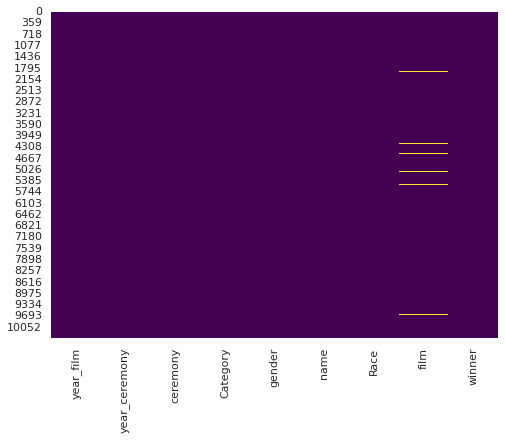

In [4]:
#find lack of data
plt.figure(figsize=(8,6))
#plot the data to find the Nan
sns.heatmap(allawards.isnull(), cmap = "viridis", cbar = False) #this function change the null data to true
plt.show()

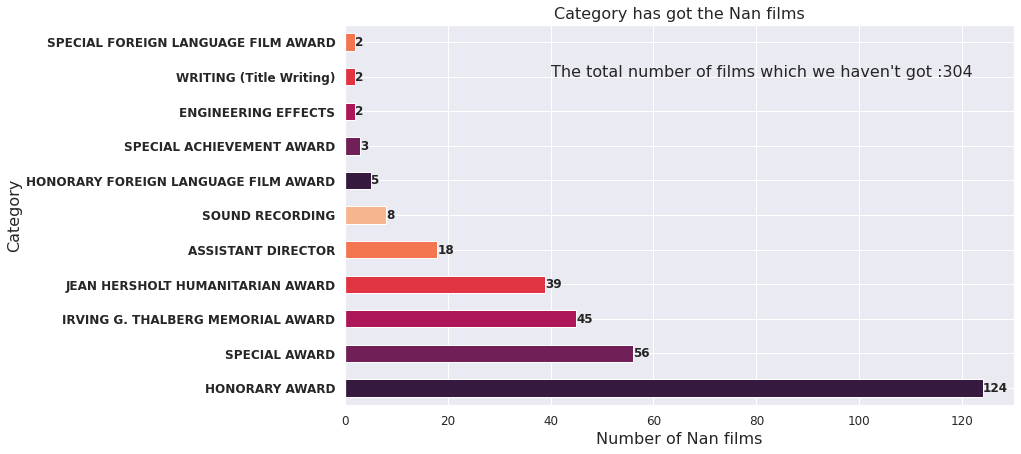

In [5]:
Category = allawards[allawards.film.isnull() == True].Category.value_counts()

#label the number in the plot
for i,value in enumerate(Category):
    plt.text(value, i, str(value), horizontalalignment='left', verticalalignment='center', weight='bold', color='#242424', fontsize=12)

#plot the bar graph
Category.plot(kind=('barh'), color = sns.color_palette("rocket") , figsize=(12,7))

#total number of Nan films
plt.text(x = 40, y = 9, s = f"The total number of films which we haven't got :{allawards[allawards.film.isnull() == True].film.size}", fontsize = 16)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12, weight = 'bold')
plt.title('Category has got the Nan films', fontsize = 16)
plt.xlabel("Number of Nan films",fontsize = 16)
plt.ylabel('Category',fontsize = 16)

plt.show()

In [6]:
print("Number of unique Categories :",allawards.Category.nunique())
print("Number of unique films : ",allawards.film.nunique())
print("Number of unique Race : ",allawards.Race.nunique())

Number of unique Categories : 94
Number of unique films :  4834
Number of unique Race :  4


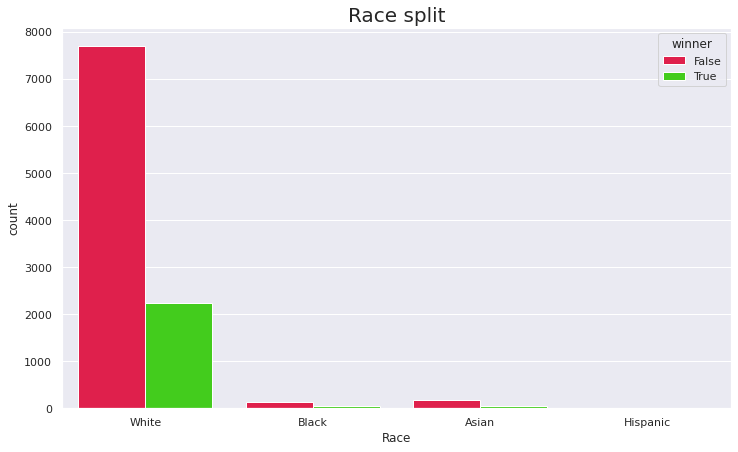

In [7]:
#Race split baes on wins oscar
#plotting the hist graph
plt.figure(figsize=(12,7))
sns.countplot(data = allawards, x = "Race" , hue='winner', palette = "prism_r" )
plt.title("Race split", fontsize=20)
plt.show()

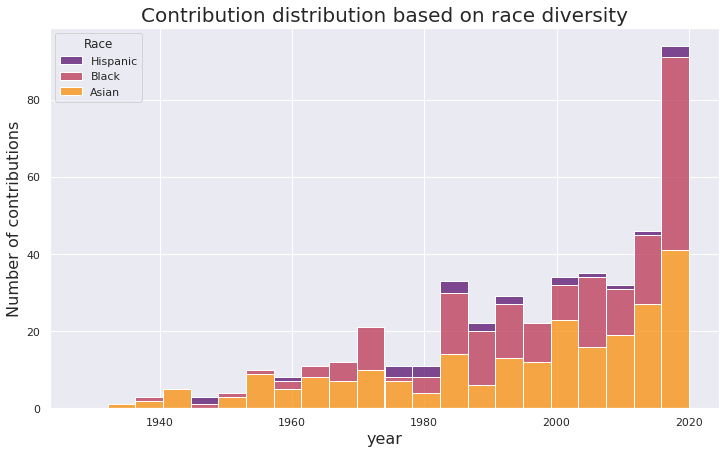

In [8]:
#distribution of contribution based on race diversity
#plotting distribution

plt.figure(figsize=(12,7))
sns.histplot(data = allawards, x='year_ceremony', hue="Race", multiple='stack', hue_order=['Hispanic', "Black", "Asian"], palette="inferno")
plt.title("Contribution distribution based on race diversity", fontsize=20)
plt.xlabel('year', fontsize=16)
plt.ylabel('Number of contributions', fontsize=16)
plt.show()

In [9]:
#remove the special awards for men and women
special = ('Best Actor', 'Best Actress', 'Best Actor in supporting role','ACTRESS IN A SUPPORTING ROLE')
data = allawards[allawards.Category != 'Best Actor']
data = data[data.Category != 'Best Actress']
data = data[data.Category != 'Best Actor in supporting role']
data = data[data.Category != 'ACTRESS IN A SUPPORTING ROLE']

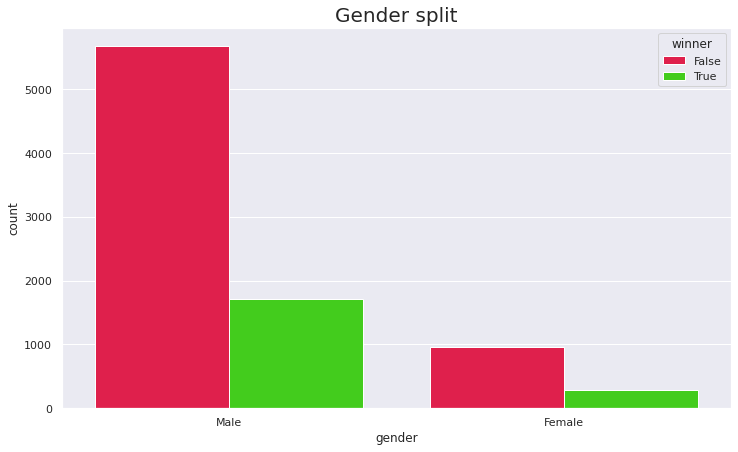

In [10]:
#gender split based on wins oscar
#plotting the hist graph
plt.figure(figsize=(12,7))
sns.countplot(data = data, x = "gender" , hue='winner', palette = "prism_r" )
plt.title("Gender split", fontsize=20)
plt.show()

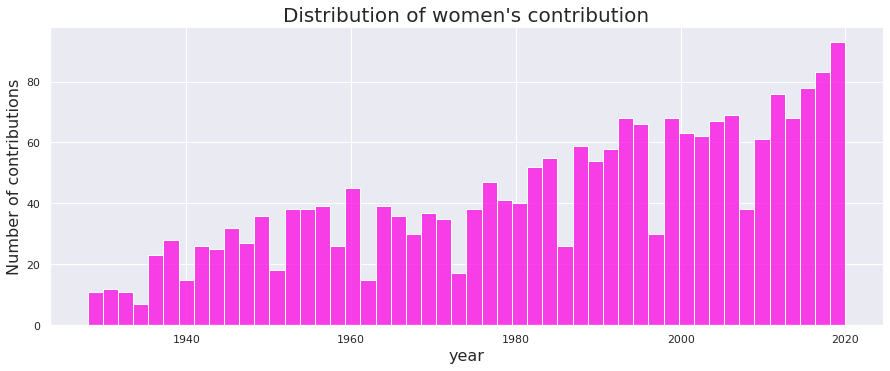

In [11]:
#distribution of women's contribution
female = allawards[allawards.gender == 'Female']

#plotting distribution
sns.displot(female.year_ceremony, bins=50, kde=False, height=5, aspect=2.5, color='#fc03e3')

plt.title("Distribution of women's contribution", fontsize=20)
plt.xlabel('year', fontsize=16)
plt.ylabel('Number of contributions', fontsize=16)
plt.show()

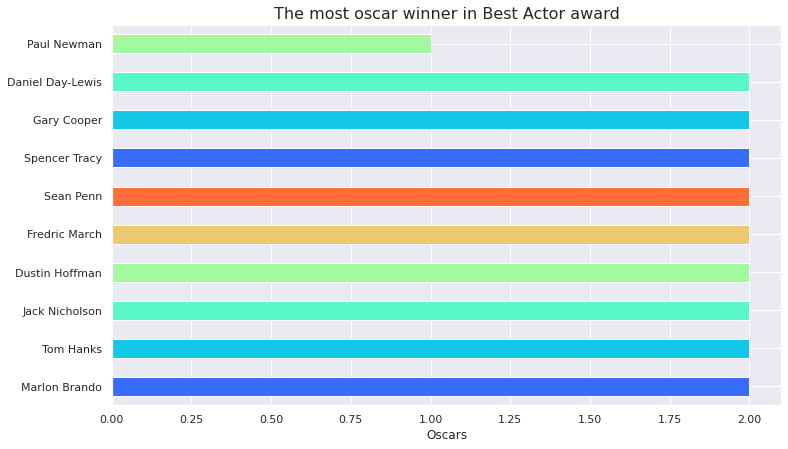

In [12]:
#more than 1 oscar winner in Best Actor
actor = allawards[allawards.Category== "Best Actor"][allawards.winner == True].name.value_counts()[:10]

actor.plot(kind=('barh'), color = sns.color_palette("rainbow") , figsize=(12,7))

plt.title("The most oscar winner in Best Actor award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

In [13]:
#name of winners in best actor who have got more than 1 oscar
actor_index = actor.index
#find the index of them
inx = []
for (j, k) in enumerate(allawards.name):
    for ac in actor_index:
        if ac ==k:
            inx.append(j)
    
win_actor = allawards.iloc[inx]
win_actor = win_actor[win_actor.Category == "Best Actor"][win_actor.winner == True]
win_actor.sort_values(['name', "year_ceremony"])

,year_film,year_ceremony,ceremony,Category,gender,name,Race,film,winner
302,2007,2008,80,Best Actor,Male,Daniel Day-Lewis,White,There Will Be Blood,True
322,2012,2013,85,Best Actor,Male,Daniel Day-Lewis,White,Lincoln,True
190,1979,1980,52,Best Actor,Male,Dustin Hoffman,White,Kramer vs. Kramer,True
226,1988,1989,61,Best Actor,Male,Dustin Hoffman,White,Rain Man,True
9,1931,1932,5,Best Actor,Male,Fredric March,White,Dr. Jekyll and Mr. Hyde,True
57,1946,1947,19,Best Actor,Male,Fredric March,White,The Best Years of Our Lives,True
37,1941,1942,14,Best Actor,Male,Gary Cooper,White,Sergeant York,True
81,1952,1953,25,Best Actor,Male,Gary Cooper,White,High Noon,True
174,1975,1976,48,Best Actor,Male,Jack Nicholson,White,One Flew over the Cuckoo's Nest,True
262,1997,1998,70,Best Actor,Male,Jack Nicholson,White,As Good as It Gets,True


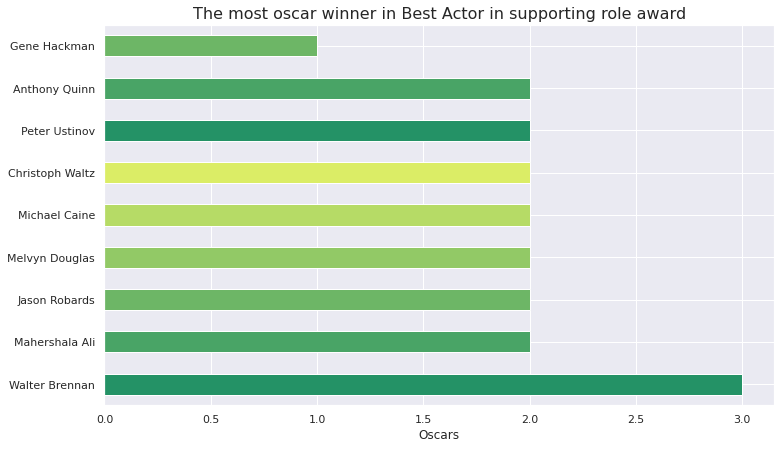

In [14]:
#more than 1 oscar winner in Best Actor in supporting role
actor = allawards[allawards.Category== "Best Actor in supporting role"][allawards.winner == True].name.value_counts()[:9]

actor.plot(kind=('barh'), color = sns.color_palette("summer") , figsize=(12,7))

plt.title("The most oscar winner in Best Actor in supporting role award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

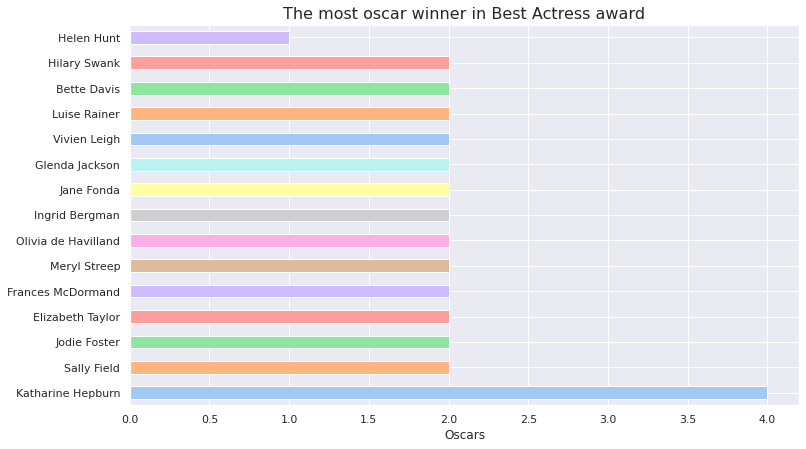

In [15]:
#more than 1 oscar winner in Best Actress
actress = allawards[allawards.Category== "Best Actress"][allawards.winner == True].name.value_counts()[:15]

actress.plot(kind=('barh'), color = sns.color_palette("pastel") , figsize=(12,7))

plt.title("The most oscar winner in Best Actress award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

In [16]:
#name of winners in best actress who have got more than 1 oscar
actress_index = actress.index
#find the index of them
inx = []
for (j, k) in enumerate(allawards.name):
    for ac in actress_index:
        if ac ==k:
            inx.append(j)
    
win_actress = allawards.iloc[inx]
win_actress = win_actress[win_actress.Category == "Best Actress"][win_actress.winner == True]
win_actress.sort_values(['name', "year_ceremony"])

,year_film,year_ceremony,ceremony,Category,gender,name,Race,film,winner
16,1935,1936,8,Best Actress,Female,Bette Davis,White,Dangerous,True
27,1938,1939,11,Best Actress,Female,Bette Davis,White,Jezebel,True
115,1960,1961,33,Best Actress,Female,Elizabeth Taylor,White,Butterfield 8,True
139,1966,1967,39,Best Actress,Female,Elizabeth Taylor,White,Who's Afraid of Virginia Woolf?,True
260,1996,1997,69,Best Actress,Female,Frances McDormand,White,Fargo,True
344,2017,2018,90,Best Actress,Female,Frances McDormand,White,"Three Billboards outside Ebbing, Missouri",True
156,1970,1971,43,Best Actress,Female,Glenda Jackson,White,Women in Love,True
168,1973,1974,46,Best Actress,Female,Glenda Jackson,White,A Touch of Class,True
264,1997,1998,70,Best Actress,Female,Helen Hunt,White,As Good as It Gets,True
272,1999,2000,72,Best Actress,Female,Hilary Swank,Hispanic,Boys Don't Cry,True


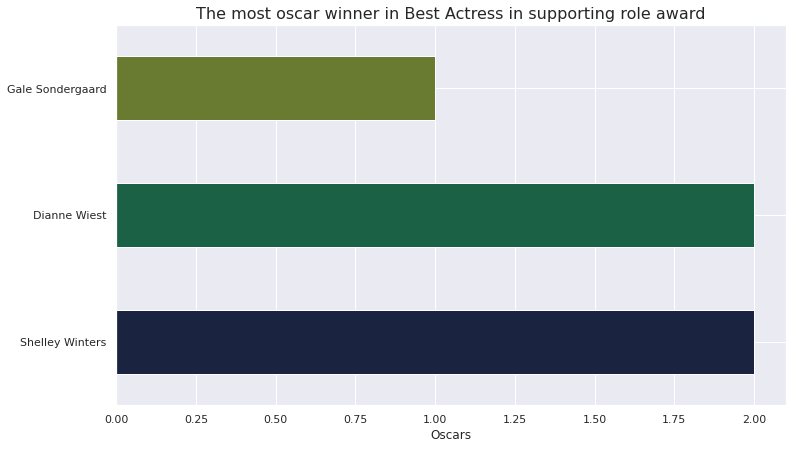

In [17]:
#more than 1 oscar winner in Best Actress in supporting role
actress = allawards[allawards.Category== "ACTRESS IN A SUPPORTING ROLE"][allawards.winner == True].name.value_counts()[:3]

actress.plot(kind=('barh'), color = sns.color_palette("cubehelix") , figsize=(12,7))

plt.title("The most oscar winner in Best Actress in supporting role award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

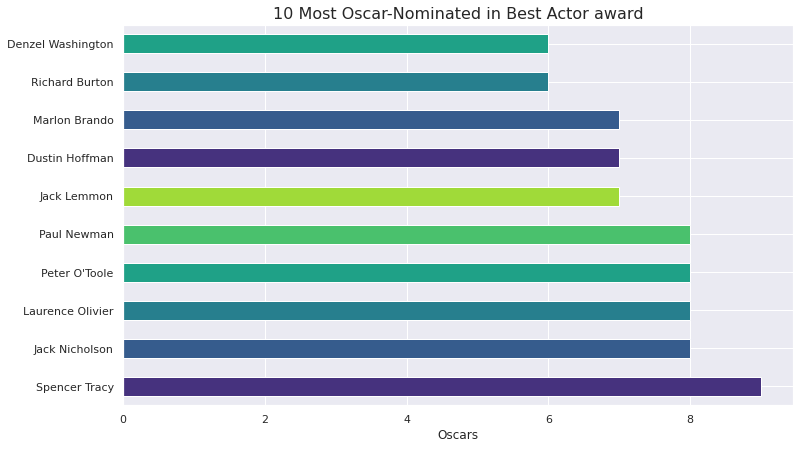

In [18]:
#more than 1 oscar nominated
actor = allawards[allawards.Category== "Best Actor"].name.value_counts()[:10]

actor.plot(kind=('barh'), color = sns.color_palette("viridis") , figsize=(12,7))

plt.xlabel("Oscars")
plt.title("10 Most Oscar-Nominated in Best Actor award", fontsize= 16)
plt.show()

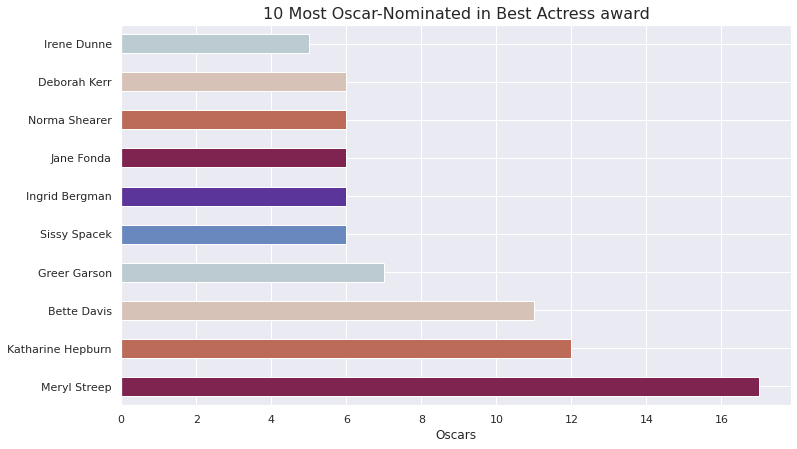

In [19]:
#more than 1 oscar nominated
actress = allawards[allawards.Category== "Best Actress"].name.value_counts()[:10]

actress.plot(kind=('barh'), color = sns.color_palette("twilight_shifted_r") , figsize=(12,7))

plt.title("10 Most Oscar-Nominated in Best Actress award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

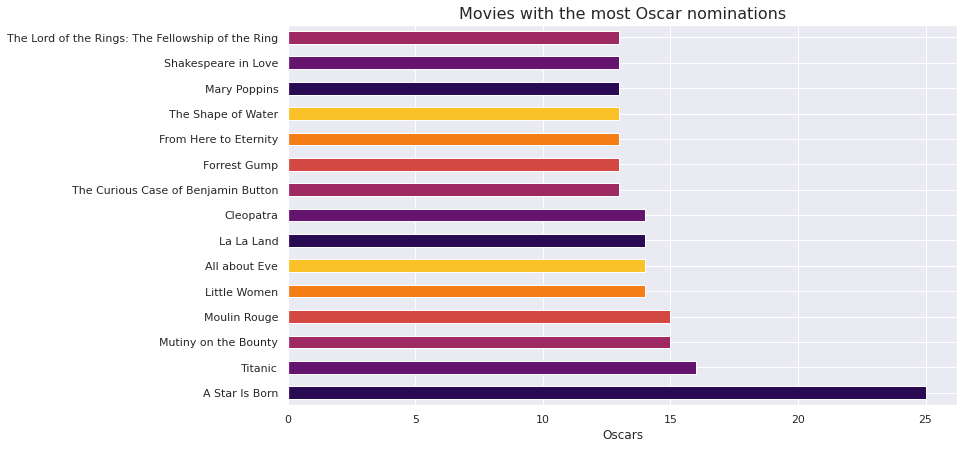

In [20]:
#Movies with the most Oscar nominations
filmdata = allawards.dropna()['film'].value_counts()[:15]
filmdata.plot(kind = 'barh', color = sns.color_palette("inferno") , figsize=(12,7))
plt.title("Movies with the most Oscar nominations", fontsize = 16)
plt.xlabel("Oscars")
plt.show()

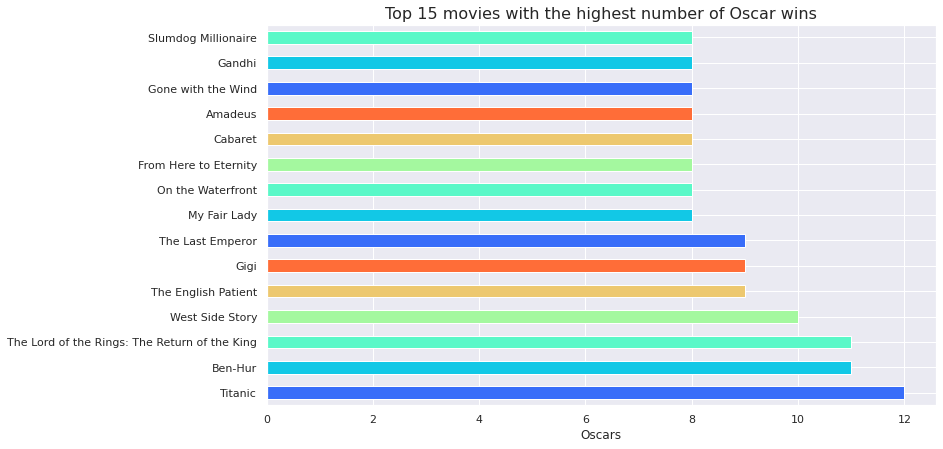

In [21]:
#top 10 movies with the highest number of Oscar wins
film_win = allawards.dropna()[allawards.winner == True]['film'].value_counts()[:15]
film_win.plot(kind = 'barh', color = sns.color_palette("rainbow") , figsize=(12,7))
plt.title("Top 15 movies with the highest number of Oscar wins", fontsize = 16)
plt.xlabel("Oscars")
plt.show()

## Part 2)

In [22]:
#read the data into pandas frame
demo_org = pd.read_csv("Oscars-demographics-DFE.csv",encoding='cp1252')  #this dataset contains demographics of oscar winners
#see the head of data
demo_org.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


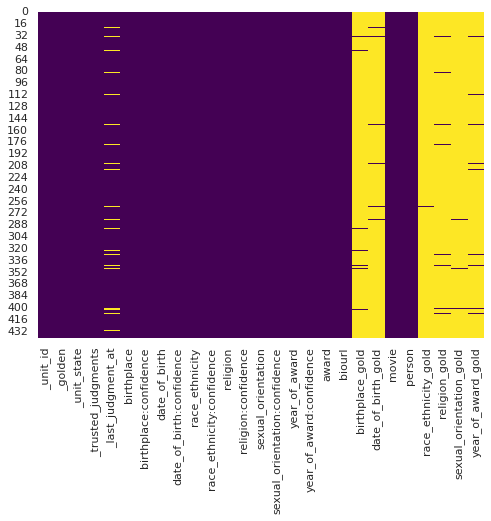

In [23]:
#find lack of data
plt.figure(figsize=(8,6))
#plot the data to find the Nan
sns.heatmap(demo_org.isnull(), cmap = "viridis", cbar = False) #this function change the null data to true
plt.show()

In [24]:
demo_org.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

In [25]:
#select some cols in orginal dataset and work to them
sol = ['birthplace', 'date_of_birth', 'race_ethnicity' ,'religion', 'sexual_orientation', 'year_of_award', 'award', 'movie', 'person']
demo = demo_org[sol]
demo.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage


In [26]:
#set date of birth into datetime to find year of birth
demo['year_of_birth'] = pd.to_datetime(demo['date_of_birth'], errors='coerce').dt.year

In [27]:
#fix the issue for read year
year = []
for x in demo['year_of_birth']:
    if x > 2000:
        year.append(x - 100)
    else:
        year.append(x)

In [28]:
#creat col for year of birth and age of winners when wins the oscar
demo['year_of_birth'] = year
demo["age"] =  demo['year_of_award'] - demo['year_of_birth']

In [29]:
demo.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,1895.0,32.0
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,1886.0,44.0
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,1895.0,36.0
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,1899.0,33.0
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,1894.0,39.0


In [30]:
print("diffrent of oscar awards in dataset :",demo.award.unique())

diffrent of oscar awards in dataset : ['Best Director' 'Best Actor' 'Best Supporting Actor' 'Best Actress'
 'Best Supporting Actress']


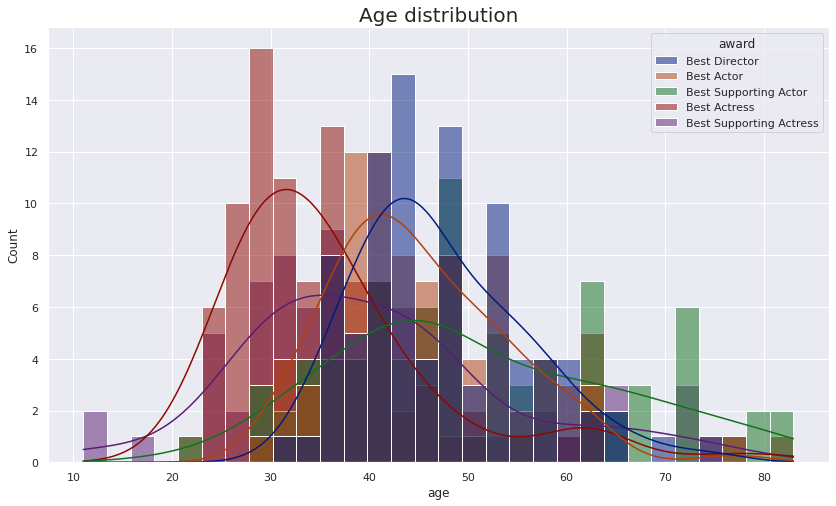

In [31]:
#age dist based on award
plt.figure(figsize=(14,8))
sns.histplot(data = demo, x = "age" , hue='award', palette = "dark" , kde= True, bins= 30)
plt.title("Age distribution", fontsize=20)
plt.show()

In [32]:
director_age = demo[demo.award == "Best Director"].age
actor_age = demo[demo.award == "Best Actor"].age
actress_age = demo[demo.award == "Best Actress"].age
sup_actress_age = demo[demo.award == "Best Supporting Actress"].age
sup_actor_age = demo[demo.award == "Best Supporting Actor"].age

In [33]:
#for Best Director age
print("Best Director Age:")
print('Mean of age:',director_age.mean())
print('Variance of age:',director_age.var())
print('Standard deviation of age:',director_age.std())
print('Skewness of age:',director_age.skew())
print('kurtosis of age:',director_age.kurtosis())

Best Director Age:
Mean of age: 47.3
Variance of age: 74.27977528089889
Standard deviation of age: 8.618571533664896
Skewness of age: 0.7618107753455292
kurtosis of age: 0.4534283197054574


In [34]:
#for Best Actor age
print("Best Actor Age:")
print('Mean of age:',actor_age.mean())
print('Variance of age:',actor_age.var())
print('Standard deviation of age:',actor_age.std())
print('Skewness of age:',actor_age.skew())
print('kurtosis of age:',actor_age.kurtosis())

Best Actor Age:
Mean of age: 45.04545454545455
Variance of age: 78.13584117032393
Standard deviation of age: 8.839448012762105
Skewness of age: 0.7726577833358725
kurtosis of age: 0.8233975435123595


In [35]:
#for Best Actress age
print("Best Actress Age:")
print('Mean of age:',actress_age.mean())
print('Variance of age:',actress_age.var())
print('Standard deviation of age:',actress_age.std())
print('Skewness of age:',actress_age.skew())
print('kurtosis of age:',actress_age.kurtosis())

Best Actress Age:
Mean of age: 36.421052631578945
Variance of age: 128.86338185890256
Standard deviation of age: 11.351800820085884
Skewness of age: 1.737596295237884
kurtosis of age: 3.3091967565127507


In [36]:
#for Best Supporting Actress age
print("Best Supporting Actress Age:")
print('Mean of age:',sup_actress_age.mean())
print('Variance of age:',sup_actress_age.var())
print('Standard deviation of age:',sup_actress_age.std())
print('Skewness of age:',sup_actress_age.skew())
print('kurtosis of age:',sup_actress_age.kurtosis())

Best Supporting Actress Age:
Mean of age: 40.50588235294118
Variance of age: 178.7291316526611
Standard deviation of age: 13.368961502400293
Skewness of age: 0.6701970710066552
kurtosis of age: 0.5790576078646437


In [37]:
#for Best Supporting Actor age
print("Best Supporting Actor Age:")
print('Mean of age:',sup_actor_age.mean())
print('Variance of age:',sup_actor_age.var())
print('Standard deviation of age:',sup_actor_age.std())
print('Skewness of age:',sup_actor_age.skew())
print('kurtosis of age:',sup_actor_age.kurtosis())

Best Supporting Actor Age:
Mean of age: 50.890243902439025
Variance of age: 203.25940981632039
Standard deviation of age: 14.256907442230254
Skewness of age: 0.41258438490047394
kurtosis of age: -0.5190466027942766


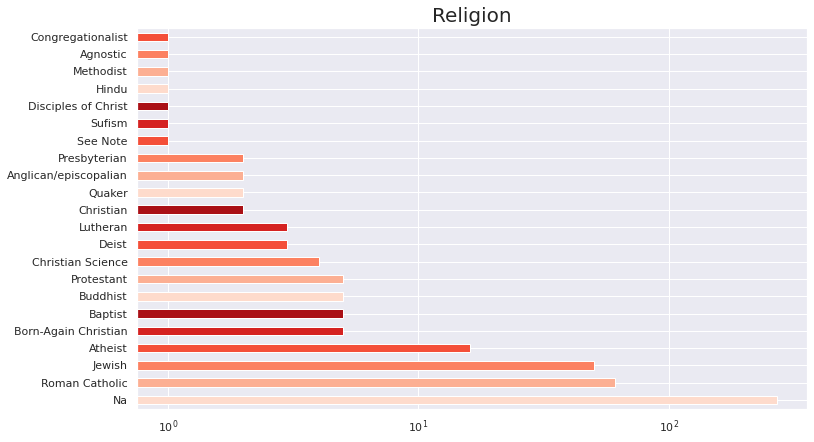

In [38]:
#Religion split baes on academy awards
#plotting the graph
plt.figure(figsize=(12,7))
demo.religion.value_counts().plot(kind = 'barh', color = sns.color_palette("Reds") , figsize=(12,7))
plt.xscale('log')
plt.title("Religion", fontsize=20)
plt.show()

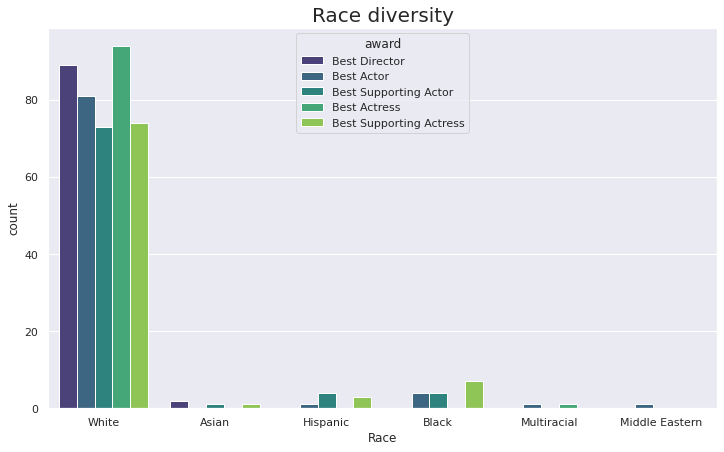

In [39]:
#Race split baes on academy awards
#plotting the graph
plt.figure(figsize=(12,7))
sns.countplot(data = demo, x = "race_ethnicity" , hue='award', palette = "viridis" )
plt.xlabel("Race")
plt.title("Race diversity", fontsize=20)
plt.show()

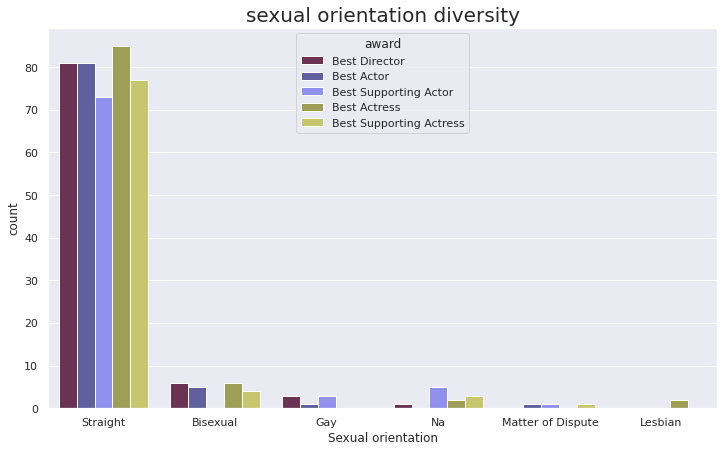

In [40]:
#sexual orientation baes on academy awards
#plotting the graph
plt.figure(figsize=(12,7))
sns.countplot(data = demo, x = "sexual_orientation" , hue='award', palette = "gist_stern" )
plt.xlabel("Sexual orientation")
plt.title("sexual orientation diversity", fontsize=20)
plt.show()

In [41]:
#find country from brith place
place = demo.birthplace.to_numpy()
#split the adress for find country
Place = []
for p in place:
    Place.append(p.split(", "))

#select just country from address
country = []
for adr in Place:
    country.append(adr[-1])
#make uppercase all country name
country = [c.upper() for c in country]


In [42]:
#read data set for find name of country
convert = pd.read_csv("Countries name.csv")
convert.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [43]:
#replce the two letter name with full name
for (n,c) in enumerate(country):
    for (id, code) in enumerate(convert.Code):
        if c == code:
            country[n] = convert.iloc[id][0]

for (n,c) in enumerate(country):
    if len(c) == 2 and c != "NA":
        country[n] = "united states"


demo["country"] = [c.capitalize() for c in country]

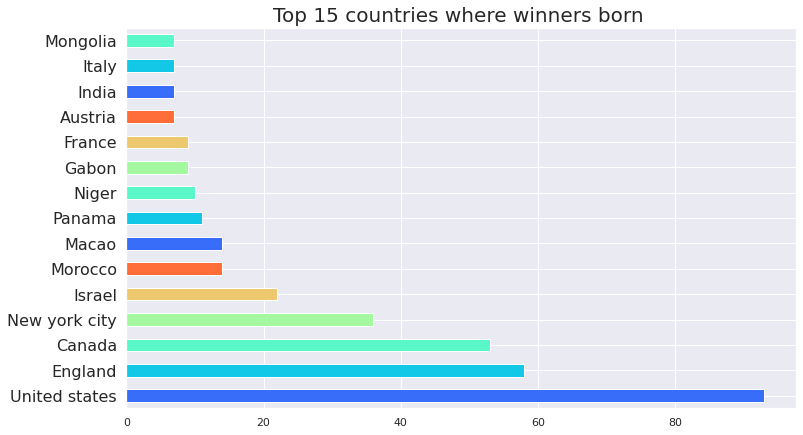

In [44]:
#most countries where winners  born
#plotting the graph
plt.figure(figsize=(12,7))
demo.country.value_counts()[:15].plot(kind = 'barh', color = sns.color_palette("rainbow") , figsize=(12,7))
plt.title("Top 15 countries where winners born ", fontsize=20)
plt.yticks(fontsize = 16)
plt.show()

## Part 3)

In [45]:
#import dataset for Best Movie
Movie = pd.read_csv("Oscar Best Picture Movies.csv")
Movie.drop('Unnamed: 0', axis= 1, inplace=True)
Movie.head()

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [46]:
Movie.columns

Index(['Film', 'Oscar Year', 'Film Studio/Producer(s)', 'Award',
       'Year of Release', 'Movie Time', 'Movie Genre', 'IMDB Rating',
       'IMDB Votes', 'Movie Info', 'Genres', 'Critic Consensus',
       'Content Rating', 'Directors', 'Authors', 'Actors',
       'Original Release Date', 'Streaming Release Date', 'Production Company',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
       'Tomatometer Rotten Critics Count', 'Film ID'],
      dtype='object')

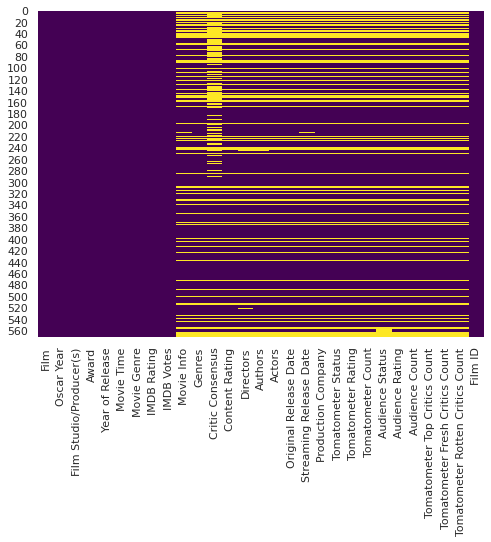

In [47]:
#find lack of data
plt.figure(figsize=(8,6))
#plot the data to find the Nan
sns.heatmap(Movie.isnull(), cmap = "viridis", cbar = False) #this function change the null data to true
plt.show()

In [48]:
#check the correlation between rating
Movie[['IMDB Rating', 'Audience Rating', 'Tomatometer Rating']].corr()

,IMDB Rating,Audience Rating,Tomatometer Rating
IMDB Rating,1.000000,0.859044,0.466360
Audience Rating,0.859044,1.000000,0.506349
Tomatometer Rating,0.466360,0.506349,1.000000


In [49]:
#average rating for winner movie
print("Average of rating for all movie that win oscar:")
print("IMDB Rating : ", Movie[Movie['Award'] == 'Winner']['IMDB Rating'].mean())
print("Audience Rating : ", Movie[Movie['Award'] == 'Winner']['Audience Rating'].mean())
print("Tomatometer Rating : ", Movie[Movie['Award'] == 'Winner']['Tomatometer Rating'].mean())

Average of rating for all movie that win oscar:
IMDB Rating :  7.783870967741935
Audience Rating :  83.07317073170732
Tomatometer Rating :  86.67073170731707


In [50]:
#average rating for nominee movie
print("Average of rating for all movie that nominated oscar:")
print("IMDB Rating : ", Movie[Movie['Award'] == 'Nominee']['IMDB Rating'].mean())
print("Audience Rating : ", Movie[Movie['Award'] == 'Nominee']['Audience Rating'].mean())
print("Tomatometer Rating : ", Movie[Movie['Award'] == 'Nominee']['Tomatometer Rating'].mean())

Average of rating for all movie that nominated oscar:
IMDB Rating :  7.528870292887029
Audience Rating :  82.28011204481793
Tomatometer Rating :  87.69467787114846


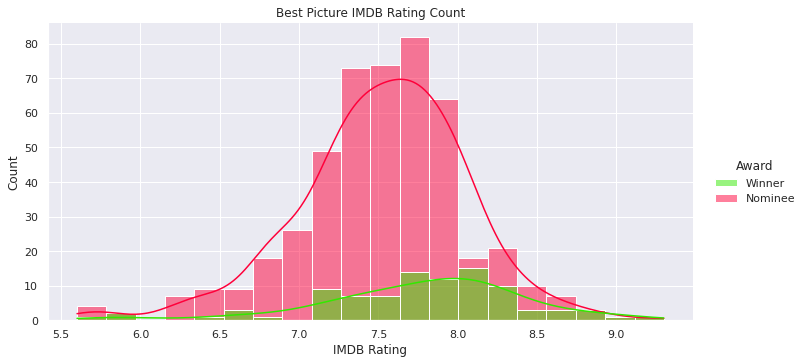

In [51]:
#plot imdb rating
sns.displot(data=Movie, x = "IMDB Rating", hue = "Award", bins=20, kde=True, height=5, aspect=2, palette="prism")
plt.title("Best Picture IMDB Rating Count")
plt.show()

In [52]:
imdb_win = Movie[Movie['Award'] == 'Winner']["IMDB Rating"]
imdb_nom = Movie[Movie['Award'] == 'Nominee']["IMDB Rating"]

In [53]:
#for movies won oscar
print("IMDB rating for Best Picture-Winning:")
print('Mean of rate:',imdb_win.mean())
print('Variance of rate:',imdb_win.var())
print('Standard deviation of rate:',imdb_win.std())
print('Skewness of rate:',imdb_win.skew())
print('kurtosis of rate:',imdb_win.kurtosis())

IMDB rating for Best Picture-Winning:
Mean of rate: 7.783870967741935
Variance of rate: 0.40919354838709665
Standard deviation of rate: 0.6396823808634224
Skewness of rate: -0.8150340343305793
kurtosis of rate: 1.567382130892876


In [54]:
#for movies nominated oscar
print("IMDB rating for Best Picture Oscar Nominees:")
print('Mean of rate:',imdb_nom.mean())
print('Variance of rate:',imdb_nom.var())
print('Standard deviation of rate:',imdb_nom.std())
print('Skewness of rate:',imdb_nom.skew())
print('kurtosis of rate:',imdb_nom.kurtosis())

IMDB rating for Best Picture Oscar Nominees:
Mean of rate: 7.528870292887029
Variance of rate: 0.2847412787382788
Standard deviation of rate: 0.5336115429207644
Skewness of rate: -0.4525411929257951
kurtosis of rate: 1.1360096134485747


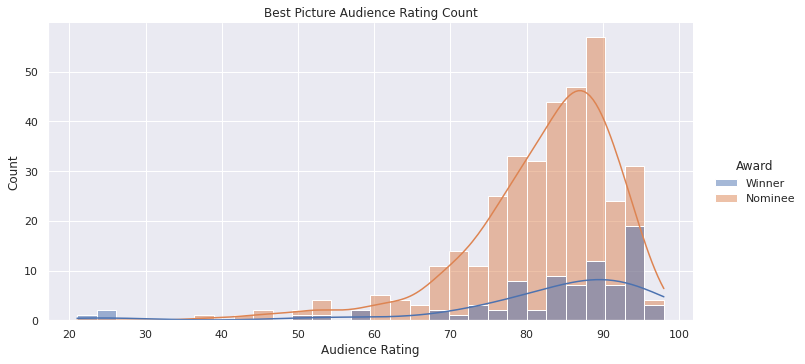

In [55]:
#plot Audience rating
sns.displot(data=Movie, x = "Audience Rating", hue = "Award", bins=30, kde=True, height=5, aspect=2)
plt.title("Best Picture Audience Rating Count")
plt.show()

In [56]:
Audi_win = Movie[Movie['Award'] == 'Winner']["Audience Rating"]
Audi_nom = Movie[Movie['Award'] == 'Nominee']["Audience Rating"]

In [57]:
#for movies won oscar
print("Audience rating for Best Picture-Winning:")
print('Mean of rate:',Audi_win.mean())
print('Variance of rate:',Audi_win.var())
print('Standard deviation of rate:',Audi_win.std())
print('Skewness of rate:',Audi_win.skew())
print('kurtosis of rate:',Audi_win.kurtosis())

Audience rating for Best Picture-Winning:
Mean of rate: 83.07317073170732
Variance of rate: 230.21680216802162
Standard deviation of rate: 15.172896960304634
Skewness of rate: -2.4866317873046997
kurtosis of rate: 6.960763972217711


In [58]:
#for movies won oscar
print("Audience rating for Best Picture Oscar Nominees:")
print('Mean of rate:',Audi_nom.mean())
print('Variance of rate:',Audi_nom.var())
print('Standard deviation of rate:',Audi_nom.std())
print('Skewness of rate:',Audi_nom.skew())
print('kurtosis of rate:',Audi_nom.kurtosis())

Audience rating for Best Picture Oscar Nominees:
Mean of rate: 82.28011204481793
Variance of rate: 94.42693481887136
Standard deviation of rate: 9.717352253513884
Skewness of rate: -1.4850136195972663
kurtosis of rate: 3.0198323271140484


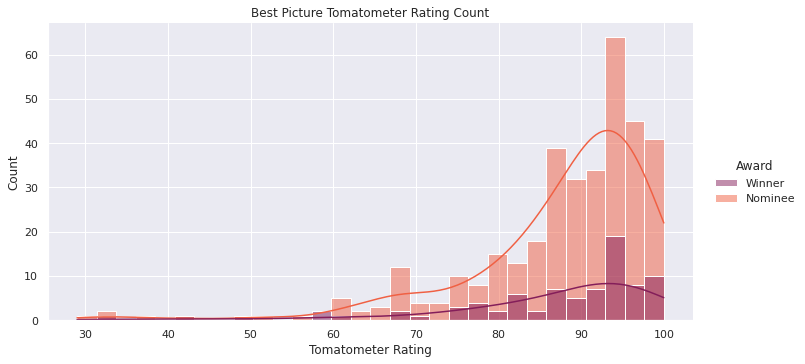

In [59]:
#plot Tomatometer rating
sns.displot(data=Movie, x = "Tomatometer Rating", hue = "Award", bins=30, kde=True, height=5, aspect=2, palette="rocket")
plt.title("Best Picture Tomatometer Rating Count")
plt.show()

In [60]:
tomato_win = Movie[Movie['Award'] == 'Winner']["Tomatometer Rating"]
tomato_nom = Movie[Movie['Award'] == 'Nominee']["Tomatometer Rating"]

In [61]:
#for movies won oscar
print("Tomatometer rating for Best Picture-Winning:")
print('Mean of rate:',tomato_win.mean())
print('Variance of rate:',tomato_win.var())
print('Standard deviation of rate:',tomato_win.std())
print('Skewness of rate:',tomato_win.skew())
print('kurtosis of rate:',tomato_win.kurtosis())

Tomatometer rating for Best Picture-Winning:
Mean of rate: 86.67073170731707
Variance of rate: 167.43345377898223
Standard deviation of rate: 12.939607945335215
Skewness of rate: -2.00780918986759
kurtosis of rate: 4.62950130495679


In [62]:
#for movies won oscar
print("Tomatometer rating for Best Picture Oscar Nominees:")
print('Mean of rate:',tomato_nom.mean())
print('Variance of rate:',tomato_nom.var())
print('Standard deviation of rate:',tomato_nom.std())
print('Skewness of rate:',tomato_nom.skew())
print('kurtosis of rate:',tomato_nom.kurtosis())

Tomatometer rating for Best Picture Oscar Nominees:
Mean of rate: 87.69467787114846
Variance of rate: 129.85876373021117
Standard deviation of rate: 11.395558947687084
Skewness of rate: -2.050650051300591
kurtosis of rate: 5.833255001778635


In [63]:
def CountFrequency(my_list):
    '''count frequency of list'''
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

In [64]:
#seperate genre for movie genre col
Genre = []
for g in Movie[Movie['Award'] == 'Winner']["Movie Genre"]:
    Genre.append(g.split(","))

allgenre_win = []
for i in range(len(Genre)):
    for j in range(len(Genre[i])):
        allgenre_win.append(Genre[i][j].strip())

In [65]:
allgenre_win  = CountFrequency(allgenre_win)

In [66]:
#seperate genre for movie genre col
Genre = []
for g in Movie[Movie['Award'] == 'Nominee']["Movie Genre"]:
    Genre.append(g.split(","))

allgenre_nom = []
for i in range(len(Genre)):
    for j in range(len(Genre[i])):
        allgenre_nom.append(Genre[i][j].strip())

In [67]:
allgenre_nom  = CountFrequency(allgenre_nom)

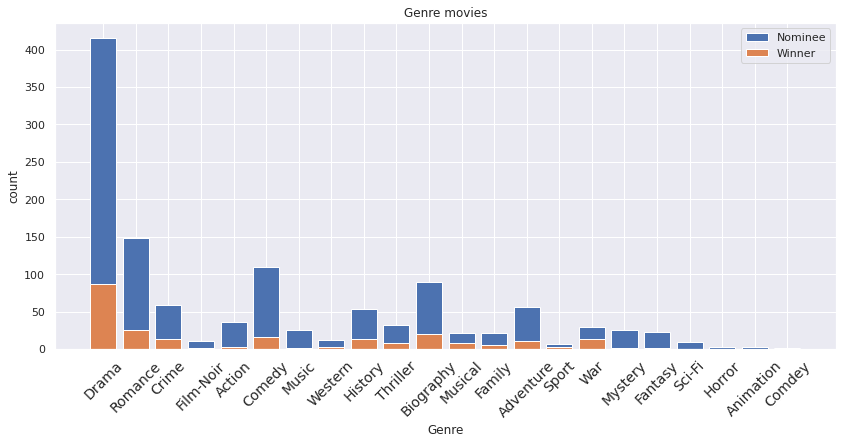

In [68]:
plt.figure(figsize = (14,6))

#plot the graoh
plt.bar(allgenre_nom.keys(), allgenre_nom.values(), label = "Nominee")
plt.bar(allgenre_win.keys(), allgenre_win.values(), label = "Winner")

plt.title("Genre movies")
plt.xlabel("Genre")
plt.ylabel("count")
plt.xticks(rotation = 45, fontsize = 14)
plt.legend()
plt.show()

In [69]:
Movie['Oscar Year'].replace('1927/28', '1928', inplace=True)
Movie['Oscar Year'].replace('1928/29', '1929', inplace=True)
Movie['Oscar Year'].replace('1929/30', '1930', inplace=True)
Movie['Oscar Year'].replace('1930/31', '1931', inplace=True)
Movie['Oscar Year'].replace('1931/32', '1932', inplace=True)
Movie['Oscar Year'].replace('1932/33', '1933', inplace=True)

In [70]:
#convert year col to datatime for plot
Movie['Oscar Year'] = pd.to_datetime(Movie['Oscar Year'])

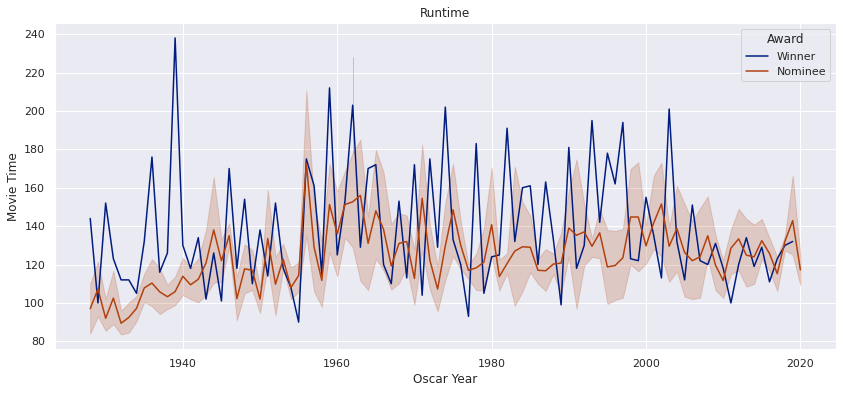

In [71]:
#plot runtime based on oscar year
plt.figure(figsize = (14,6))
sns.lineplot(data = Movie, x = 'Oscar Year', y = 'Movie Time', color = 'm', hue= "Award", palette="dark")
plt.title("Runtime")
plt.show()

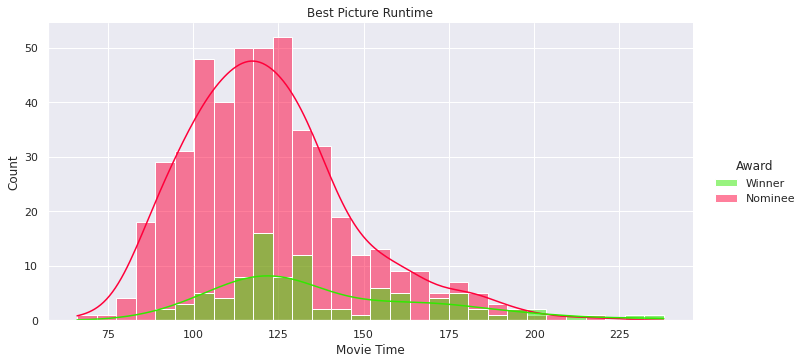

In [72]:
#plot runtime
sns.displot(data=Movie, x = "Movie Time", hue = "Award", bins=30, kde=True, height=5, aspect=2, palette="prism")
plt.title("Best Picture Runtime")
plt.show()

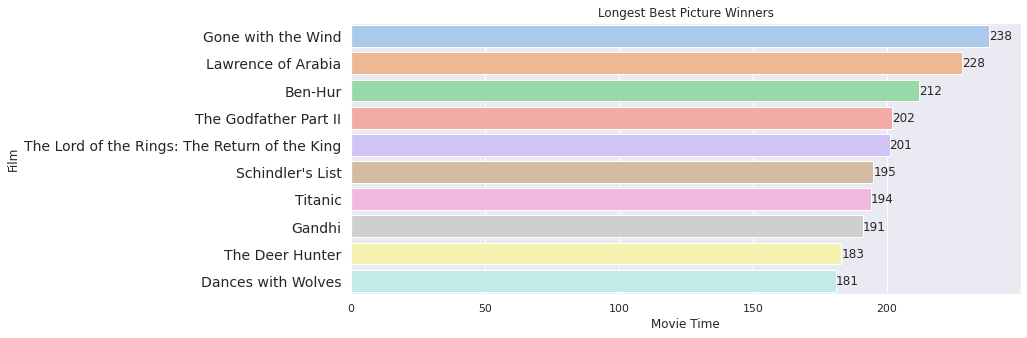

In [73]:
#Longest Best Picture Winners
longest = Movie[Movie['Award'] == 'Winner'][["Movie Time", "Film"]].sort_values(by= "Movie Time", ascending=False)[:10]

plt.figure(figsize = (12,5))
ax = sns.barplot(data = longest, x="Movie Time", y = "Film", palette="pastel")
plt.title("Longest Best Picture Winners")
ax.bar_label(ax.containers[0])
plt.yticks(fontsize= 14)
plt.show()


In [87]:
studio_nom = Movie[Movie['Award'] == 'Nominee']['Film Studio/Producer(s)'].value_counts()[:10]
studio_win = Movie[Movie['Award'] == 'Winner']['Film Studio/Producer(s)'].value_counts()[:10]

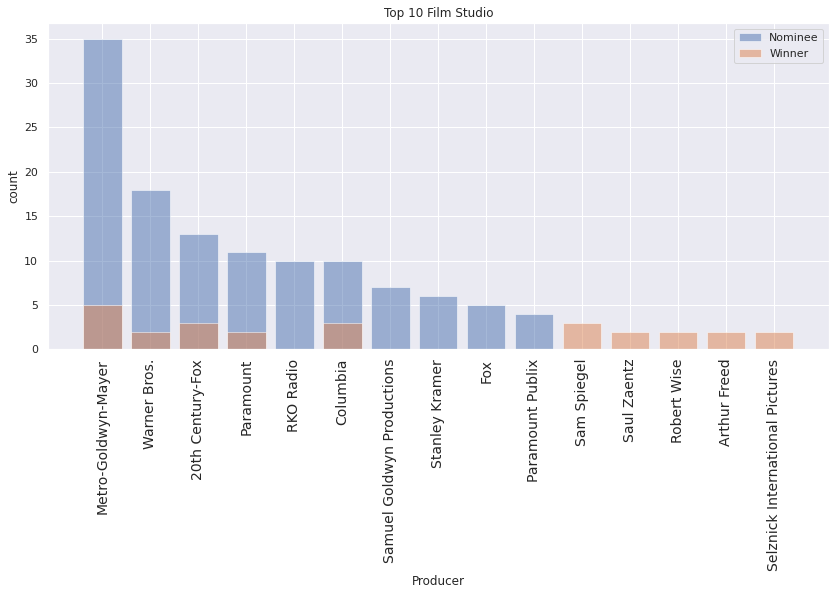

In [94]:
#Film Studio/Producer(s)
plt.figure(figsize = (14,6))

#plot the graoh
plt.bar(studio_nom.index, studio_nom.values, label = "Nominee", alpha = 0.5)
plt.bar(studio_win.index, studio_win.values, label = "Winner", alpha = 0.5)

plt.title("Top 10 Film Studio")
plt.xlabel("Producer")
plt.ylabel("count")
plt.xticks(rotation = 90, fontsize = 14)
plt.legend()
plt.show()

In [162]:
#seperate author for authors col
author = []
for a in Movie[Movie['Award'] == 'Winner']["Authors"].dropna():
    author.append(a.split(", "))

author_win = []
for i in range(len(author)):
    for j in range(len(author[i])):
        author_win.append(author[i][j].strip())

In [163]:
author_win  = CountFrequency(author_win)
author_win = dict(sorted(author_win.items(), key=lambda item: item[1], reverse=True))
author_win = dict(list(author_win.items())[:10])

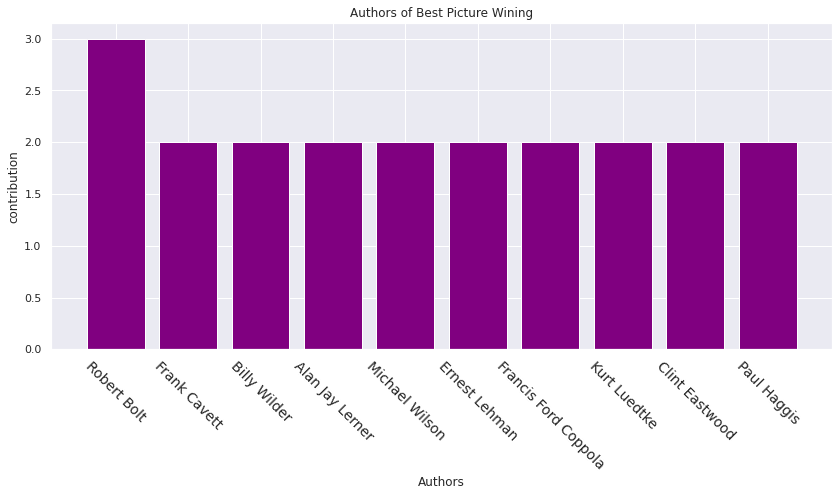

In [164]:
plt.figure(figsize = (14,6))

#plot the graoh
plt.bar(author_win.keys(), author_win.values(), color = "purple")

plt.title("Authors of Best Picture Wining")
plt.xlabel("Authors")
plt.ylabel("contribution")
plt.xticks(rotation = -45, fontsize = 14)

plt.show()

In [165]:
#seperate author for authors col
author = []
for a in Movie[Movie['Award'] == 'Nominee']["Authors"].dropna():
    author.append(a.split(", "))

author_nom = []
for i in range(len(author)):
    for j in range(len(author[i])):
        author_nom.append(author[i][j].strip())

In [166]:
author_nom = CountFrequency(author_nom)
author_nom = dict(sorted(author_nom.items(), key=lambda item: item[1], reverse=True))
author_nom = dict(list(author_nom.items())[:25])

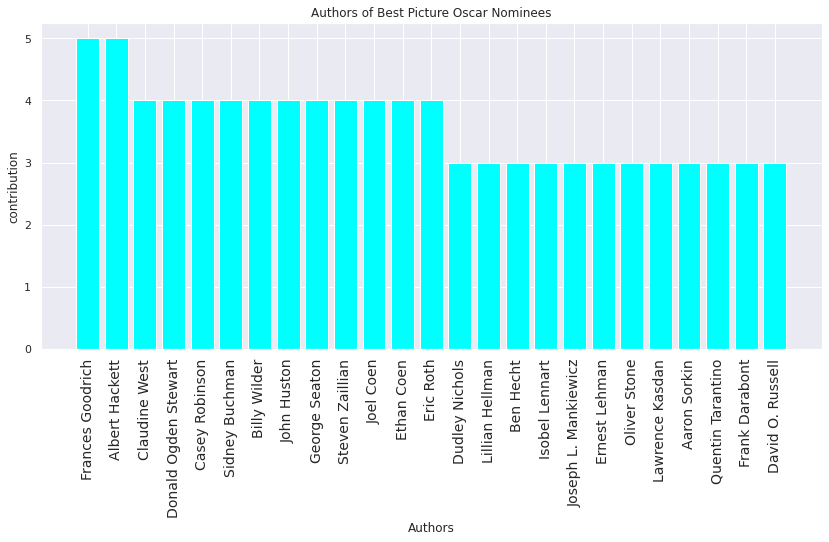

In [168]:
plt.figure(figsize = (14,6))

#plot the graoh
plt.bar(author_nom.keys(), author_nom.values(), color = "cyan")

plt.title("Authors of Best Picture Oscar Nominees")
plt.xlabel("Authors")
plt.ylabel("contribution")
plt.xticks(rotation = 90, fontsize = 14)

plt.show()

In [179]:
#seperate director for directors col
director = []
for a in Movie[Movie['Award'] == 'Winner']["Directors"].dropna():
    director.append(a.split(", "))

director_win = []
for i in range(len(director)):
    for j in range(len(director[i])):
        director_win.append(director[i][j].strip())

In [180]:
director_win  = CountFrequency(director_win)
director_win = dict(sorted(director_win.items(), key=lambda item: item[1], reverse=True))
director_win = dict(list(director_win.items())[:15])

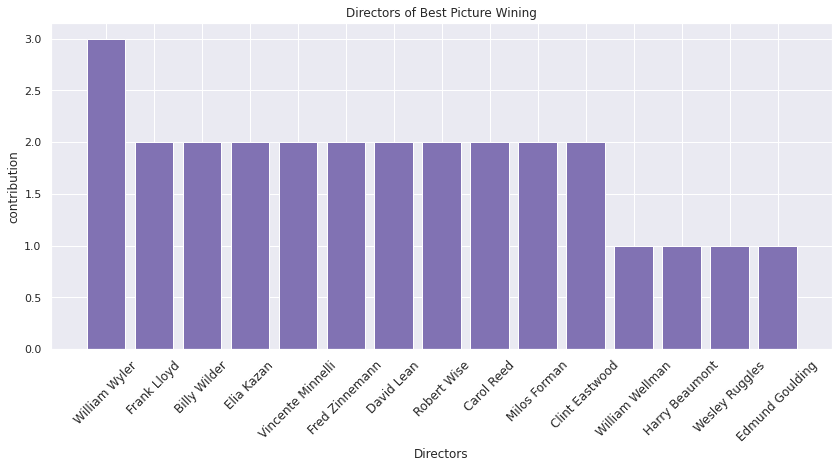

In [192]:
plt.figure(figsize = (14,6))

#plot the graoh
plt.bar(director_win.keys(), director_win.values(), color = "m")

plt.title("Directors of Best Picture Wining")
plt.xlabel("Directors")
plt.ylabel("contribution")
plt.xticks(rotation = 45, fontsize = 12)

plt.show()

In [182]:
#seperate director for directors col
director = []
for a in Movie[Movie['Award'] == 'Nominee']["Directors"].dropna():
    director.append(a.split(", "))

director_nom = []
for i in range(len(director)):
    for j in range(len(director[i])):
        director_nom.append(director[i][j].strip())

In [183]:
director_nom = CountFrequency(director_nom)
director_nom = dict(sorted(director_nom.items(), key=lambda item: item[1], reverse=True))
director_nom = dict(list(director_nom.items())[:25])

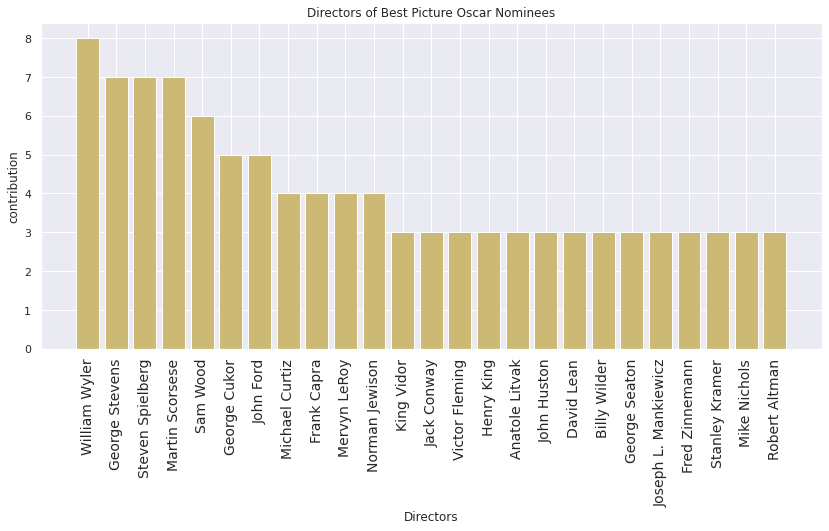

In [190]:
plt.figure(figsize = (14,6))

#plot the graoh
plt.bar(director_nom.keys(), director_nom.values(), color = "y")

plt.title("Directors of Best Picture Oscar Nominees")
plt.xlabel("Directors")
plt.ylabel("contribution")
plt.xticks(rotation = 90, fontsize = 14)

plt.show()

In [209]:
#seperate actor for actors col
actor = []
for a in Movie[Movie['Award'] == 'Winner']["Actors"].dropna():
    actor.append(a.split(", "))

actor_win = []
for i in range(len(actor)):
    for j in range(len(actor[i])):
        actor_win.append(actor[i][j].strip())

In [210]:
actor_win  = CountFrequency(actor_win)
actor_win = dict(sorted(actor_win.items(), key=lambda item: item[1], reverse=True))
actor_win = dict(list(actor_win.items())[:40])

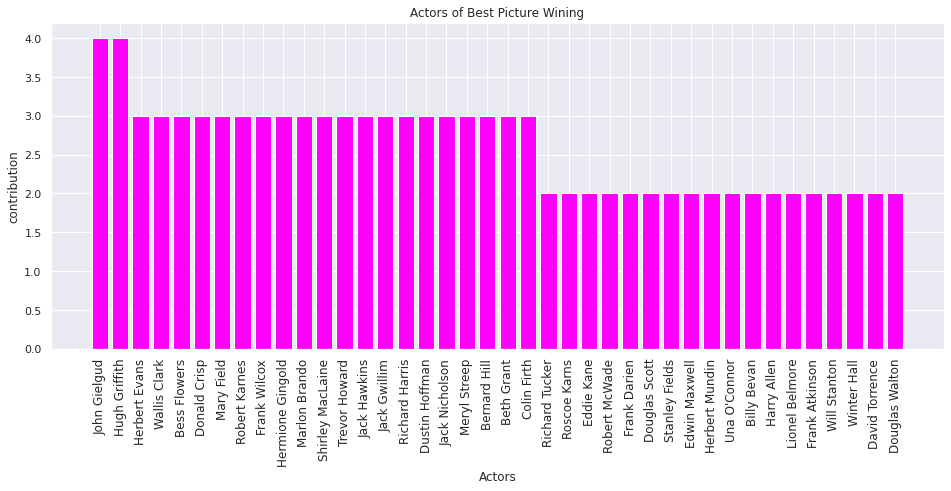

In [222]:
plt.figure(figsize = (16,6))

#plot the graoh
plt.bar(actor_win.keys(), actor_win.values(), color = "magenta")

plt.title("Actors of Best Picture Wining")
plt.xlabel("Actors")
plt.ylabel("contribution")
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

In [216]:
#seperate actor for actors col
actor = []
for a in Movie[Movie['Award'] == 'Nominee']["Actors"].dropna():
    actor.append(a.split(", "))

actor_nom = []
for i in range(len(actor)):
    for j in range(len(actor[i])):
        actor_nom.append(actor[i][j].strip())

In [217]:
actor_nom = CountFrequency(actor_nom)
actor_nom = dict(sorted(actor_nom.items(), key=lambda item: item[1], reverse=True))
actor_nom = dict(list(actor_nom.items())[:50])

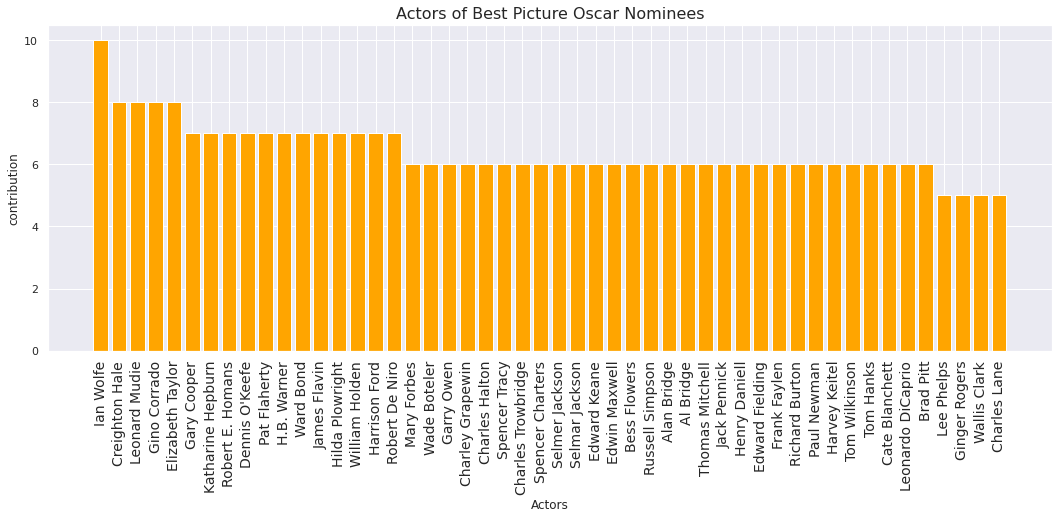

In [221]:
plt.figure(figsize = (18,6))

#plot the graoh
plt.bar(actor_nom.keys(), actor_nom.values(), color = "orange")

plt.title("Actors of Best Picture Oscar Nominees",  fontsize = 16)
plt.xlabel("Actors")
plt.ylabel("contribution")
plt.xticks(rotation = 90, fontsize = 14)

plt.show()

## Part 4)

In [225]:
#read the data into pandas frame 
imdb = pd.read_csv("IMDB Top 250 Lists (1996 - 2021).csv")  #this dataset contains 250 top imdb movies
#see the head of data
imdb.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


In [249]:
#top 250 imdb
imdbset = set(imdb.Title)
len(imdbset)

742

In [250]:
#oscar best picture winning 
oscarset = set(Movie[Movie['Award'] == 'Winner']["Film"])
len(oscarset)

92

In [251]:
#intersection of Best picture winnig and top 250 imdb
intersection = imdbset & oscarset

In [246]:
len(intersection)

59

In [255]:
print("percentage of movies that be in in both top IMDB and Oscar: ",((92 - 59) / 92)*100)

percentage of movies that be in in both top IMDB and Oscar:  35.869565217391305
